In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

<IPython.core.display.Javascript object>

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df=df.rename({'R&D Spend':'rnd_spend','Marketing Spend':'marketing_spend'},axis=1)

In [4]:
df.head()

,rnd_spend,Administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
df['State'].value_counts()

New York      16
California    16
Florida       16
Name: State, dtype: int64

In [5]:
df.shape

(50, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rnd_spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   marketing_spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.corr()

,rnd_spend,Administration,marketing_spend,Profit
rnd_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

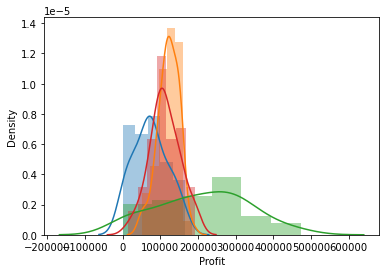

In [10]:
sns.distplot(df['rnd_spend'])
sns.distplot(df['Administration'])
sns.distplot(df['marketing_spend'])
sns.distplot(df['Profit'])

<IPython.core.display.Javascript object>

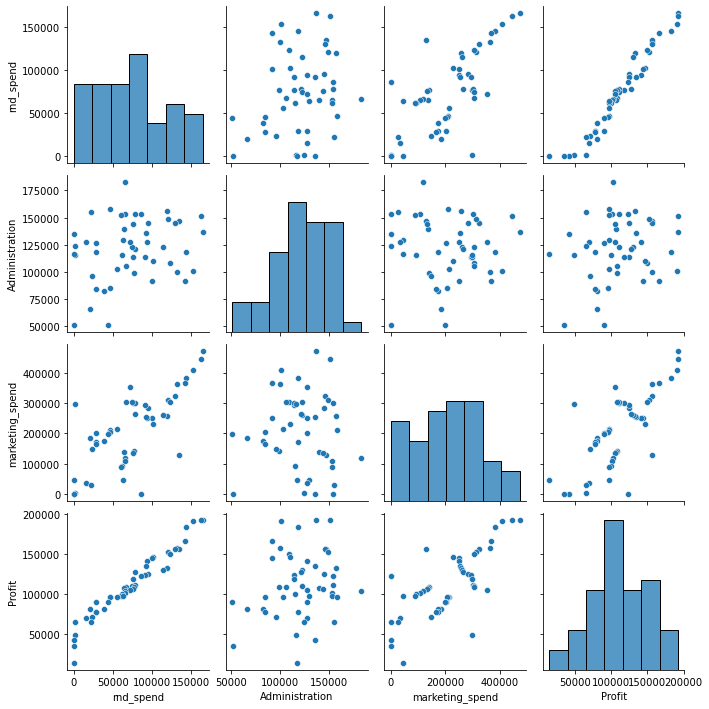

In [11]:
sns.pairplot(df)

In [12]:
df.columns

Index(['rnd_spend', 'Administration', 'marketing_spend', 'State', 'Profit'], dtype='object')

In [13]:
model=smf.ols('Profit~rnd_spend+Administration+marketing_spend+State',data=df).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.34e-27
Time:                        08:36:05   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
rnd_spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
marketing_spend       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
residual=model.resid

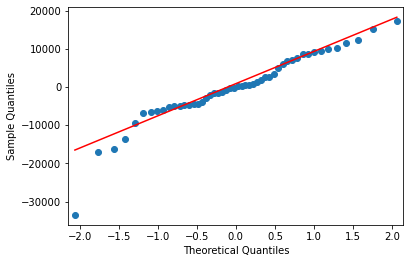

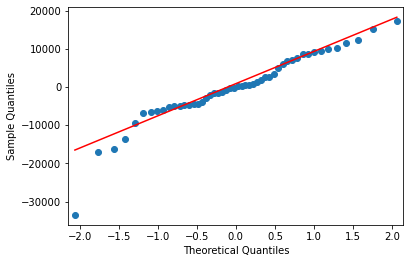

In [37]:
sm.qqplot(residual,line='q')

In [16]:
residual.mean()

1.8017890397459268e-07

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

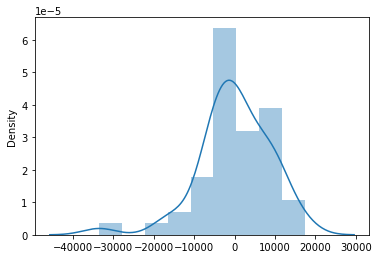

In [17]:
sns.distplot(residual)

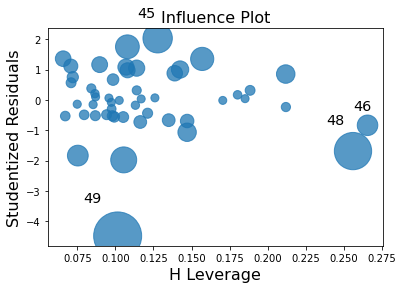

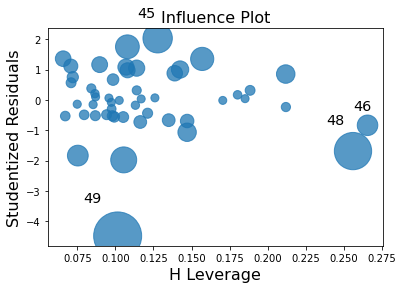

In [18]:
influence_plot(model)

In [19]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=3*(k+1)/n
leverage_cutoff

0.36

In [20]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [21]:
c

array([7.67941282e-06, 3.96002384e-03, 2.78948395e-02, 2.35705108e-02,
       1.40231490e-02, 1.17098970e-02, 2.49314176e-03, 4.16542624e-03,
       7.29467176e-05, 6.31415598e-03, 2.21391699e-02, 1.93512168e-02,
       2.13263552e-02, 7.40092001e-03, 7.20165958e-02, 4.34157410e-02,
       1.57591120e-02, 4.33058862e-03, 3.43997076e-03, 3.28909738e-02,
       7.03247647e-04, 1.17002661e-02, 3.52541534e-03, 3.68801928e-04,
       5.07030667e-03, 4.16365620e-03, 5.79414020e-03, 3.25030423e-02,
       1.07438091e-03, 1.14685871e-04, 2.67092819e-05, 4.26003185e-06,
       6.55180125e-04, 2.69550649e-04, 2.09894518e-02, 8.32171521e-03,
       5.92471519e-02, 7.19280440e-05, 5.58017593e-02, 1.60830329e-03,
       2.27122555e-03, 2.19513492e-03, 1.66164967e-04, 2.33988898e-02,
       1.16697070e-04, 9.43947846e-02, 4.23233340e-02, 4.48153392e-03,
       1.56376134e-01, 2.63959436e-01])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<StemContainer object of 3 artists>

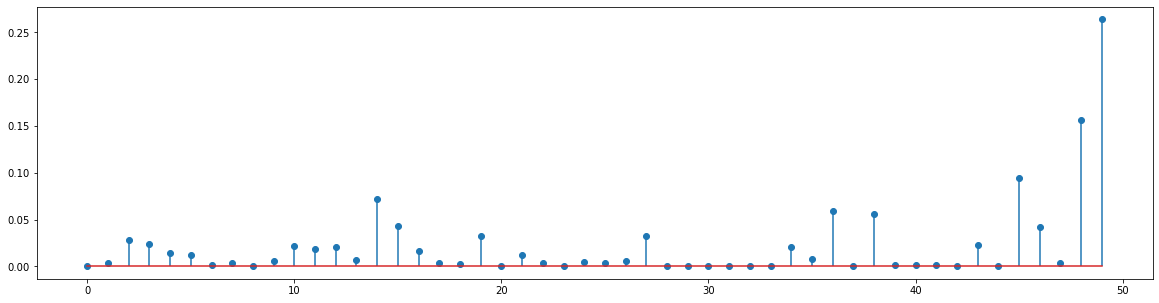

In [22]:
plt.figure(figsize=(20,5))
plt.stem(np.arange(len(df)),np.round(c,3))

In [23]:
model.fittedvalues

0     192390.571364
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133818
5     163473.807120
6     158099.292788
7     160155.644650
8     151634.743327
9     154829.662528
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301169
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236604
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311048
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232003
48     49123.073082
49     48185.038791


In [24]:
df['predicted_profit']=model.predict(df[['rnd_spend','Administration','marketing_spend','State']])


In [25]:
df.head()

,rnd_spend,Administration,marketing_spend,State,Profit,predicted_profit
0,165349.20,136897.80,471784.10,New York,192261.83,192390.571364
1,162597.70,151377.59,443898.53,California,191792.06,189071.320106
2,153441.51,101145.55,407934.54,Florida,191050.39,182276.186735
3,144372.41,118671.85,383199.62,New York,182901.99,173584.976191
4,142107.34,91391.77,366168.42,Florida,166187.94,172277.133818


In [26]:
df['residuals']=residual

In [27]:
df.head()

,rnd_spend,Administration,marketing_spend,State,Profit,predicted_profit,residuals
0,165349.20,136897.80,471784.10,New York,192261.83,192390.571364,-128.741364
1,162597.70,151377.59,443898.53,California,191792.06,189071.320106,2720.739894
2,153441.51,101145.55,407934.54,Florida,191050.39,182276.186735,8774.203265
3,144372.41,118671.85,383199.62,New York,182901.99,173584.976191,9317.013809
4,142107.34,91391.77,366168.42,Florida,166187.94,172277.133818,-6089.193818


In [28]:
np.argmax(c)

<IPython.core.display.Javascript object>

49

In [29]:
df=df.drop(df.index[49],axis=0).reset_index()
df.shape

(49, 8)

In [30]:
model1=smf.ols('Profit~rnd_spend+Administration+marketing_spend+State',data=df).fit()
model1.rsquared

0.9618082858227786

In [31]:
model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<StemContainer object of 3 artists>

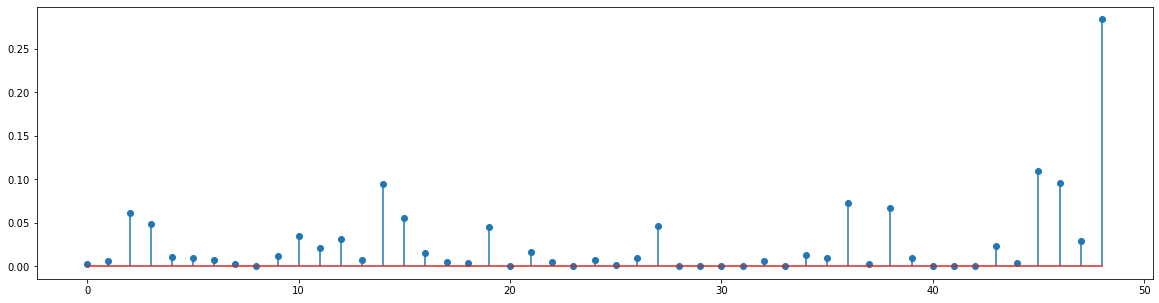

In [32]:
plt.figure(figsize=(20,5))
plt.stem(np.arange(len(df)),np.round(c,3))

In [33]:
np.argmax(c)

<IPython.core.display.Javascript object>

48

In [34]:
df=df.drop(df.index[48],axis=0).reset_index()
df.shape

(48, 9)

In [35]:
model2=smf.ols('Profit~rnd_spend+Administration+marketing_spend+State',data=df).fit()
model2.rsquared

0.9628371102993712

In [ ]:
# from cooks distance, the kind of outliers are found and two rows are eliminated from original data
# this increased r_squared value from 0.951 to 0.963 

In [36]:
model4=smf.ols('Profit~State',data=df).fit()
model4.rsquared

0.014253997019407438

<IPython.core.display.Javascript object>

eval_env: 1


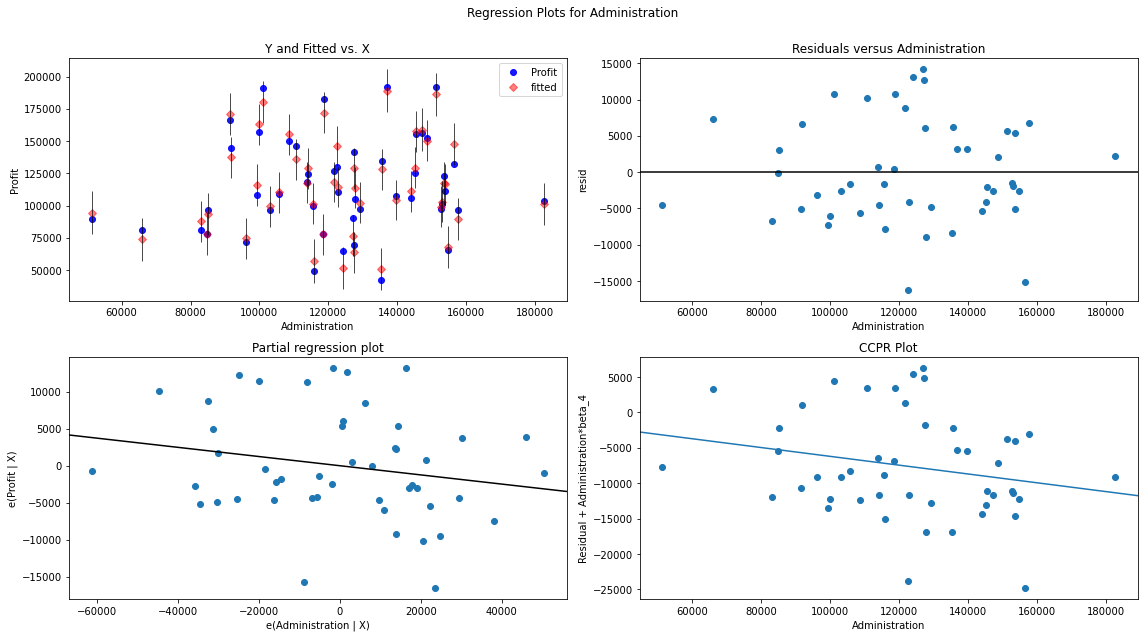

In [41]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model2,'Administration',fig=fig)

<IPython.core.display.Javascript object>

eval_env: 1


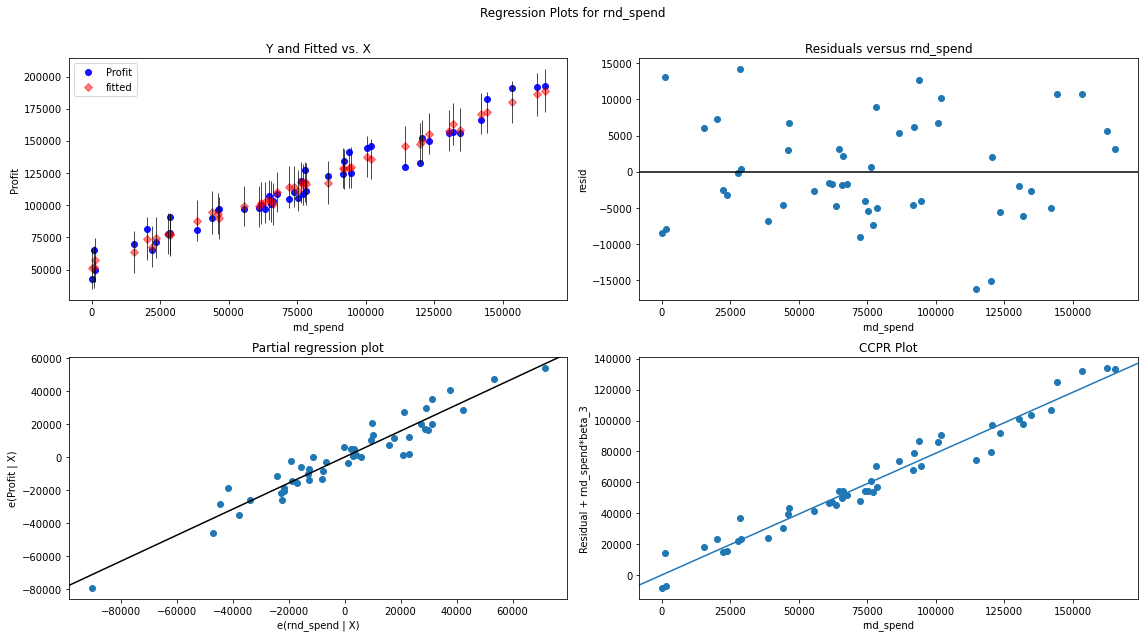

In [42]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model2,'rnd_spend',fig=fig)

<IPython.core.display.Javascript object>

eval_env: 1


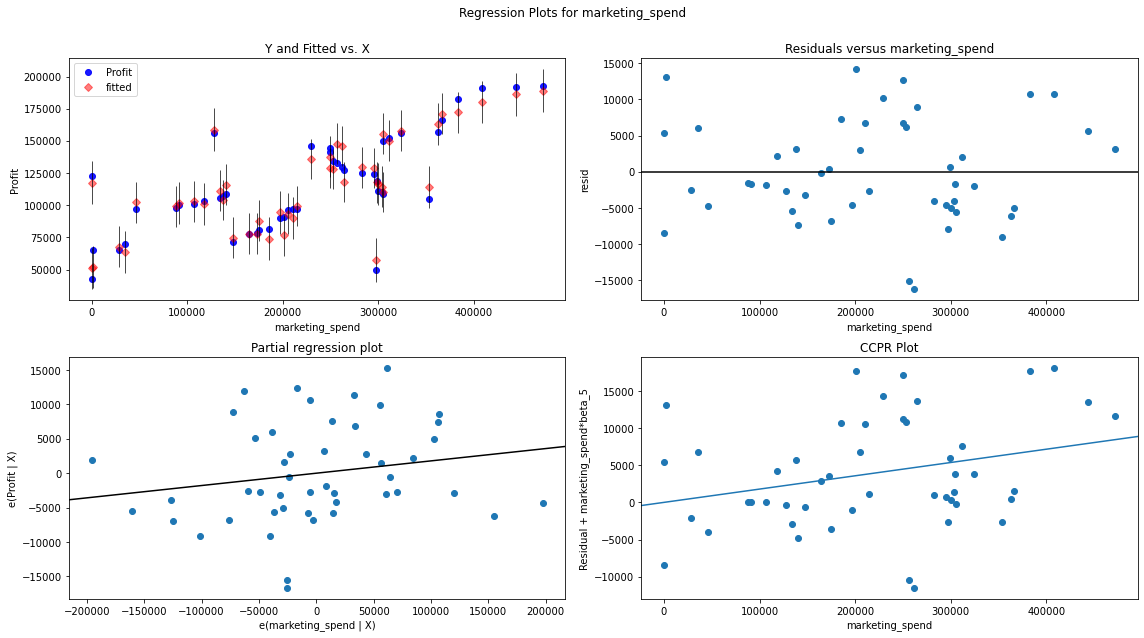

In [43]:
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model2,'marketing_spend',fig=fig)